In [1]:
import pandas as pd

# Define the path to the CSV file
csv_path_appliance = "/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/metadata_and_surveys/metadata/appliance.csv"

# Load the CSV file into a DataFrame
df_appliance = pd.read_csv(csv_path_appliance)

# Display the first few rows of the DataFrame
print(df_appliance.head())


   applianceid  homeid  roomid applianceclass powertype  appliancetype  \
0          907      47     650           food       gas         gashob   
1          908      47     650           food  electric  fridgefreezer   
2          909      47     650           food  electric          grill   
3          910      47     650           food  electric        toaster   
4          911      47     650           food  electric         kettle   

        appliancesubtype  number  
0         gasCookingHobs       4  
1  combinedFridgeFreezer       1  
2                  grill       1  
3                toaster       1  
4                 kettle       1  


In [2]:
appliance_counts = df_appliance.groupby(['homeid', 'powertype'])['appliancetype'].nunique().reset_index()
appliance_counts = appliance_counts.rename(columns={'appliancetype': 'countappliance'})
appliance_counts

,homeid,powertype,countappliance
0,47,electric,6
1,47,gas,4
2,55,electric,8
3,55,gas,2
4,59,electric,6
...,...,...,...
525,333,gas,5
526,334,electric,9
527,334,gas,2
528,335,electric,10


In [3]:
appliance_counts['homeid'].unique()

array([ 47,  55,  59,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  88,  89,  90,  91,  92,  93,  94,  96,  97,  98,
        99, 100, 101, 102, 105, 106, 107, 109, 110, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 194, 195, 197, 199, 200, 201, 202,
       203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
       218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
       232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
       245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 25

In [4]:
appliance_counts = df_appliance.groupby(['homeid', 'powertype'])['appliancetype'].nunique().reset_index()

# Pivot the DataFrame to have 'homeid' as rows and 'powertype' as columns
df_appliance_proc = appliance_counts.pivot(index='homeid', columns='powertype', values='appliancetype').fillna(0)

# Rename the columns
df_appliance_proc = df_appliance_proc.rename(columns={'electric': 'electric_appliance', 'gas': 'gas_appliance'})

# Reset the index to turn 'homeid' back into a column
df_appliance_proc = df_appliance_proc.reset_index()

# Convert to integers
df_appliance_proc['electric_appliance'] = df_appliance_proc['electric_appliance'].astype(int)
df_appliance_proc['gas_appliance'] = df_appliance_proc['gas_appliance'].astype(int)

selected_columns = ['homeid', 'electric_appliance', 'gas_appliance']
df_appliance_proc = df_appliance_proc[selected_columns]
df_appliance_proc

powertype,homeid,electric_appliance,gas_appliance
0,47,6,4
1,55,8,2
2,59,6,1
3,61,8,5
4,62,7,5
...,...,...,...
251,331,9,4
252,332,9,5
253,333,6,5
254,334,9,2


In [5]:
df_appliance['applianceclass'].unique()

array(['food', 'water', 'heating', 'other'], dtype=object)

In [6]:
zero_appliance_rows = df_appliance[df_appliance['powertype'].isnull()]
homeids_with_zero_appliance = zero_appliance_rows['homeid']
homeids_with_zero_appliance

981     149
1173    159
Name: homeid, dtype: int64

In [7]:
df_appliance['powertype'].unique()

array(['gas', 'electric', 'other_fuel', nan], dtype=object)

In [8]:
df_appliance['appliancetype'].unique()

array(['gashob', 'fridgefreezer', 'grill', 'toaster', 'kettle',
       'electricoven', 'washingmachine', 'sink', 'shower', 'bath',
       'freezer', 'fridge', 'microwave', 'dishwasher', 'gasfire',
       'vacuumcleaner', 'gasoven', 'electrichob',
       'washingmachinetumbledrier', 'electricshower', 'electricheater',
       'tumbledrier', 'woodburningstove', 'dehumidifier', 'other'],
      dtype=object)

In [9]:
df_appliance.shape

(3440, 8)

In [10]:
# Define the path to the CSV file
csv_path_home = "/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/metadata_and_surveys/metadata/home.csv"

# Load the CSV file into a DataFrame
df_home = pd.read_csv(csv_path_home)

# Display the first few rows of the DataFrame
df_home

,homeid,install_type,location,residents,starttime,starttime_enhanced,endtime,cohortid,income_band,study_class,...,urban_rural_name,build_era,new_build_year,smart_monitors,smart_automation,occupied_days,occupied_nights,entry_floor,outdoor_space,outdoor_drying
0,47,standard,Edinburgh,2,10/08/2016 00:00,NaN,08/05/2017 09:00,treatment_20170315,Missing,treatment,...,Large Urban Areas,1900-1918,NaN,Don't own,Don't own,2,7,3rd,No,NaN
1,59,standard,Edinburgh,2,06/10/2016 00:00,NaN,28/01/2018 07:56,control_20170315,"£90,000 or more",control,...,Large Urban Areas,1900-1918,NaN,Don't own,Don't own,3,7,Ground,Yes - shared with neighbours,Yes
2,61,enhanced,Edinburgh,2,06/10/2016 00:00,17/11/2016 00:00,19/10/2017 07:00,enhanced_20170213,"£48,600 to £53,999",enhanced,...,Large Urban Areas,1919-1930,NaN,Don't own,Don't own,2,7,Ground,Yes - shared with neighbours,Yes
3,62,enhanced,Edinburgh,2,26/08/2016 00:00,11/10/2016 00:00,30/06/2018 22:59,enhanced_20170213,"£43,200 to £48,599",enhanced,...,Large Urban Areas,1850-1899,NaN,Don't own,Don't own,1,7,2nd,Yes - shared with neighbours,Yes
4,64,standard,Edinburgh,4,20/10/2016 00:00,NaN,30/06/2018 22:59,treatment_20170315,"£66,000 to £77,999",treatment,...,Large Urban Areas,Before 1850,NaN,Don't own,Don't own,6,7,1st,Yes - shared with neighbours,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,331,standard,Fife,2,12/04/2018 11:57,NaN,30/06/2018 22:59,treatment_20180514,"£54,000 to £65,999",treatment,...,Other Urban Areas,1965-1980,NaN,Don't own,Don't own,7,7,Ground,Yes - private,Yes
251,332,standard,Edinburgh,1,19/04/2018 09:14,NaN,30/06/2018 22:59,treatment_20180514,"£32,400 to £37,799",treatment,...,Large Urban Areas,1919-1930,NaN,Don't own,Don't own,2,7,Ground,Yes - private,Yes
252,334,standard,Edinburgh,5,30/04/2018 07:14,NaN,30/06/2018 22:59,control_20180514,"less than £10,800",control,...,Large Urban Areas,1850-1899,NaN,Don't own,Don't own,4,7,Ground,Yes - shared with neighbours,Yes
253,335,standard,EastLothian,4,30/04/2018 13:42,NaN,30/06/2018 22:59,treatment_20180514,"£78,000 to £89,999",treatment,...,Other Urban Areas,1991-1995,NaN,Don't own,Don't own,2,7,Ground,Yes - private,Yes


In [11]:
df_home['entry_floor'].unique()

array(['3rd', 'Ground', '2nd', '1st', '4th', 'Basement (level -1)', '5th',
       'Attic'], dtype=object)

In [12]:
floor_mapping = {
    'Basement (level -1)': -1,
    'Ground': 0,
    '1st': 1,
    '2nd': 2,
    '3rd': 3,
    '4th': 4,
    '5th': 5,
    'Attic': 6
}

# Replace the floor values into numbers
df_home['entry_floor'] = df_home['entry_floor'].replace(floor_mapping)

In [13]:
df_home['entry_floor']

0      3
1      0
2      0
3      2
4      1
      ..
250    0
251    0
252    0
253    0
254    1
Name: entry_floor, Length: 255, dtype: int64

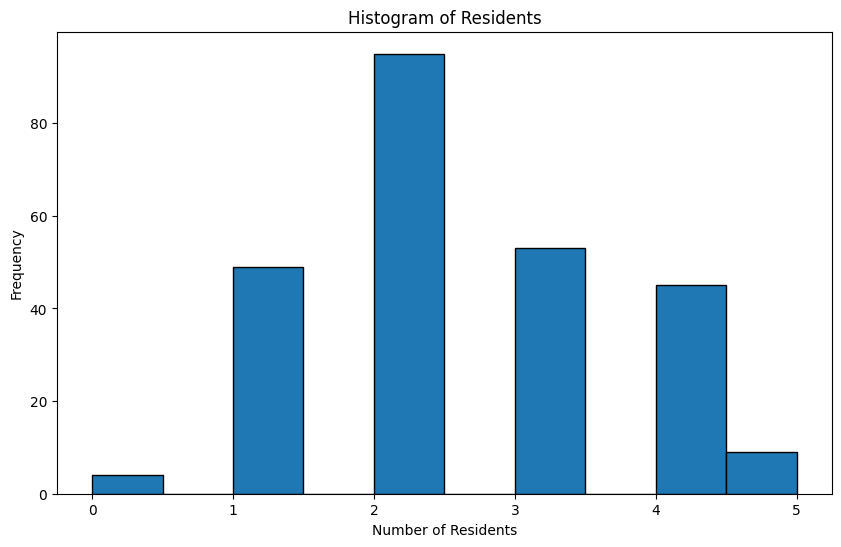

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10, 6))
plt.hist(df_home['residents'], bins=10, edgecolor='black')
plt.title('Histogram of Residents')
plt.xlabel('Number of Residents')
plt.ylabel('Frequency')
plt.show()

In [15]:
#search the homeid for 0 residentes
zero_residents_rows = df_home[df_home['residents'] == 0]
homeids_with_zero_residents = zero_residents_rows['homeid']
homeids_with_zero_residents

96     171
142    219
150    228
195    271
Name: homeid, dtype: int64

In [16]:
# Step 1: Identify Unique Income Bands and Create Mapping
unique_income_bands = df_home['income_band'].unique()
income_band_mapping = {band: i for i, band in enumerate(unique_income_bands)}

# Replace 'income_band' with numerical values
df_home['income_band_num'] = df_home['income_band'].map(income_band_mapping)

print("Income Band Mapping:", income_band_mapping)
display(df_home)

Income Band Mapping: {'Missing': 0, '£90,000 or more': 1, '£48,600 to £53,999': 2, '£43,200 to £48,599': 3, '£66,000 to £77,999': 4, '£54,000 to £65,999': 5, '£27,000 to £32,399': 6, 'less than £10,800': 7, '£37,800 to £43,199': 8, '£23,400 to £26,999': 9, '£16,200 to £19,799': 10, '£32,400 to £37,799': 11, '£78,000 to £89,999': 12, '£13,500 to £16,199': 13, '£10,800 to £13,499': 14, '£19,800 to £23,399': 15}


,homeid,install_type,location,residents,starttime,starttime_enhanced,endtime,cohortid,income_band,study_class,...,build_era,new_build_year,smart_monitors,smart_automation,occupied_days,occupied_nights,entry_floor,outdoor_space,outdoor_drying,income_band_num
0,47,standard,Edinburgh,2,10/08/2016 00:00,NaN,08/05/2017 09:00,treatment_20170315,Missing,treatment,...,1900-1918,NaN,Don't own,Don't own,2,7,3,No,NaN,0
1,59,standard,Edinburgh,2,06/10/2016 00:00,NaN,28/01/2018 07:56,control_20170315,"£90,000 or more",control,...,1900-1918,NaN,Don't own,Don't own,3,7,0,Yes - shared with neighbours,Yes,1
2,61,enhanced,Edinburgh,2,06/10/2016 00:00,17/11/2016 00:00,19/10/2017 07:00,enhanced_20170213,"£48,600 to £53,999",enhanced,...,1919-1930,NaN,Don't own,Don't own,2,7,0,Yes - shared with neighbours,Yes,2
3,62,enhanced,Edinburgh,2,26/08/2016 00:00,11/10/2016 00:00,30/06/2018 22:59,enhanced_20170213,"£43,200 to £48,599",enhanced,...,1850-1899,NaN,Don't own,Don't own,1,7,2,Yes - shared with neighbours,Yes,3
4,64,standard,Edinburgh,4,20/10/2016 00:00,NaN,30/06/2018 22:59,treatment_20170315,"£66,000 to £77,999",treatment,...,Before 1850,NaN,Don't own,Don't own,6,7,1,Yes - shared with neighbours,Yes,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,331,standard,Fife,2,12/04/2018 11:57,NaN,30/06/2018 22:59,treatment_20180514,"£54,000 to £65,999",treatment,...,1965-1980,NaN,Don't own,Don't own,7,7,0,Yes - private,Yes,5
251,332,standard,Edinburgh,1,19/04/2018 09:14,NaN,30/06/2018 22:59,treatment_20180514,"£32,400 to £37,799",treatment,...,1919-1930,NaN,Don't own,Don't own,2,7,0,Yes - private,Yes,11
252,334,standard,Edinburgh,5,30/04/2018 07:14,NaN,30/06/2018 22:59,control_20180514,"less than £10,800",control,...,1850-1899,NaN,Don't own,Don't own,4,7,0,Yes - shared with neighbours,Yes,7
253,335,standard,EastLothian,4,30/04/2018 13:42,NaN,30/06/2018 22:59,treatment_20180514,"£78,000 to £89,999",treatment,...,1991-1995,NaN,Don't own,Don't own,2,7,0,Yes - private,Yes,12


In [17]:
# Transform 'starttime' column to datetime
df_home['starttime'] = pd.to_datetime(df_home['starttime'], format='%d/%m/%Y %H:%M')

# Create new columns for start date and time
df_home['start_date'] = pd.to_datetime(df_home['starttime'].dt.date)
df_home['start_time'] = df_home['starttime'].dt.time

# Transform 'endtime' column to datetime
df_home['endtime'] = pd.to_datetime(df_home['endtime'], format='%d/%m/%Y %H:%M')

# Create new columns for end date and time
df_home['end_date'] = df_home['endtime'].dt.date
df_home['end_time'] = df_home['endtime'].dt.time

df_home['start_date'] = pd.to_datetime(df_home['start_date'])
df_home['end_date'] = pd.to_datetime(df_home['end_date'])


In [18]:
df_home.dtypes

homeid                         int64
install_type                  object
location                      object
residents                      int64
starttime             datetime64[ns]
starttime_enhanced            object
endtime               datetime64[ns]
cohortid                      object
income_band                   object
study_class                   object
hometype                      object
equivalised_income            object
occupancy                     object
urban_rural_class             object
urban_rural_name              object
build_era                     object
new_build_year               float64
smart_monitors                object
smart_automation              object
occupied_days                  int64
occupied_nights                int64
entry_floor                    int64
outdoor_space                 object
outdoor_drying                object
income_band_num                int64
start_date            datetime64[ns]
start_time                    object
e

In [19]:
df_home['days_between'] = (df_home['end_date'] - df_home['start_date']).dt.days
df_home

,homeid,install_type,location,residents,starttime,starttime_enhanced,endtime,cohortid,income_band,study_class,...,occupied_nights,entry_floor,outdoor_space,outdoor_drying,income_band_num,start_date,start_time,end_date,end_time,days_between
0,47,standard,Edinburgh,2,2016-08-10 00:00:00,NaN,2017-05-08 09:00:00,treatment_20170315,Missing,treatment,...,7,3,No,NaN,0,2016-08-10,00:00:00,2017-05-08,09:00:00,271
1,59,standard,Edinburgh,2,2016-10-06 00:00:00,NaN,2018-01-28 07:56:00,control_20170315,"£90,000 or more",control,...,7,0,Yes - shared with neighbours,Yes,1,2016-10-06,00:00:00,2018-01-28,07:56:00,479
2,61,enhanced,Edinburgh,2,2016-10-06 00:00:00,17/11/2016 00:00,2017-10-19 07:00:00,enhanced_20170213,"£48,600 to £53,999",enhanced,...,7,0,Yes - shared with neighbours,Yes,2,2016-10-06,00:00:00,2017-10-19,07:00:00,378
3,62,enhanced,Edinburgh,2,2016-08-26 00:00:00,11/10/2016 00:00,2018-06-30 22:59:00,enhanced_20170213,"£43,200 to £48,599",enhanced,...,7,2,Yes - shared with neighbours,Yes,3,2016-08-26,00:00:00,2018-06-30,22:59:00,673
4,64,standard,Edinburgh,4,2016-10-20 00:00:00,NaN,2018-06-30 22:59:00,treatment_20170315,"£66,000 to £77,999",treatment,...,7,1,Yes - shared with neighbours,Yes,4,2016-10-20,00:00:00,2018-06-30,22:59:00,618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,331,standard,Fife,2,2018-04-12 11:57:00,NaN,2018-06-30 22:59:00,treatment_20180514,"£54,000 to £65,999",treatment,...,7,0,Yes - private,Yes,5,2018-04-12,11:57:00,2018-06-30,22:59:00,79
251,332,standard,Edinburgh,1,2018-04-19 09:14:00,NaN,2018-06-30 22:59:00,treatment_20180514,"£32,400 to £37,799",treatment,...,7,0,Yes - private,Yes,11,2018-04-19,09:14:00,2018-06-30,22:59:00,72
252,334,standard,Edinburgh,5,2018-04-30 07:14:00,NaN,2018-06-30 22:59:00,control_20180514,"less than £10,800",control,...,7,0,Yes - shared with neighbours,Yes,7,2018-04-30,07:14:00,2018-06-30,22:59:00,61
253,335,standard,EastLothian,4,2018-04-30 13:42:00,NaN,2018-06-30 22:59:00,treatment_20180514,"£78,000 to £89,999",treatment,...,7,0,Yes - private,Yes,12,2018-04-30,13:42:00,2018-06-30,22:59:00,61


In [20]:
print(df_home.columns)


Index(['homeid', 'install_type', 'location', 'residents', 'starttime',
       'starttime_enhanced', 'endtime', 'cohortid', 'income_band',
       'study_class', 'hometype', 'equivalised_income', 'occupancy',
       'urban_rural_class', 'urban_rural_name', 'build_era', 'new_build_year',
       'smart_monitors', 'smart_automation', 'occupied_days',
       'occupied_nights', 'entry_floor', 'outdoor_space', 'outdoor_drying',
       'income_band_num', 'start_date', 'start_time', 'end_date', 'end_time',
       'days_between'],
      dtype='object')


In [21]:
#df_home = pd.set_option('display.max_columns', None)
#df_home

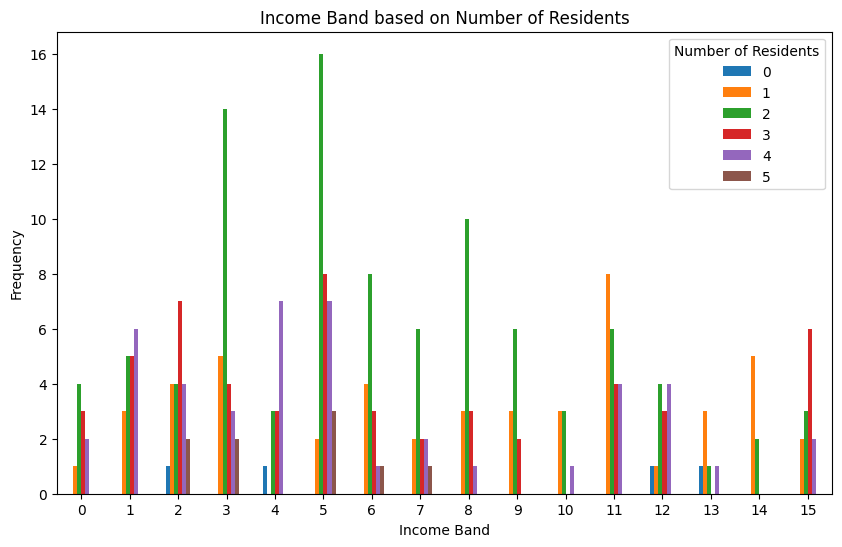

In [22]:
# Create a crosstab of 'income_band' and 'residents'
crosstab = pd.crosstab(df_home['income_band_num'], df_home['residents'])

# Plotting the crosstab as a bar plot using seaborn for better aesthetics
crosstab.plot(kind='bar', figsize=(10, 6))
plt.title('Income Band based on Number of Residents')
plt.xlabel('Income Band')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Number of Residents')
plt.show()

In [23]:
columns_to_drop = ['install_type', 'starttime', 'starttime_enhanced', 'endtime', 'cohortid',
                   'smart_automation', 'income_band', 'study_class', 'outdoor_drying',
                   'outdoor_space', 'occupancy', 'urban_rural_name', 'build_era',
                   'new_build_year', 'smart_monitors', 'start_time', 'end_time', 'urban_rural_class']
# Drop the specified columns
df_home = df_home.drop(columns=columns_to_drop)

# Display the DataFrame after dropping the columns
df_home

,homeid,location,residents,hometype,equivalised_income,occupied_days,occupied_nights,entry_floor,income_band_num,start_date,end_date,days_between
0,47,Edinburgh,2,flat,missing,2,7,3,0,2016-08-10,2017-05-08,271
1,59,Edinburgh,2,flat,above_median,3,7,0,1,2016-10-06,2018-01-28,479
2,61,Edinburgh,2,house_or_bungalow,above_median,2,7,0,2,2016-10-06,2017-10-19,378
3,62,Edinburgh,2,flat,above_median,1,7,2,3,2016-08-26,2018-06-30,673
4,64,Edinburgh,4,flat,above_median,6,7,1,4,2016-10-20,2018-06-30,618
...,...,...,...,...,...,...,...,...,...,...,...,...
250,331,Fife,2,house_or_bungalow,above_median,7,7,0,5,2018-04-12,2018-06-30,79
251,332,Edinburgh,1,flat,above_median,2,7,0,11,2018-04-19,2018-06-30,72
252,334,Edinburgh,5,flat,below_median,4,7,0,7,2018-04-30,2018-06-30,61
253,335,EastLothian,4,house_or_bungalow,above_median,2,7,0,12,2018-04-30,2018-06-30,61


In [24]:
# Define the path to the CSV file
csv_path_loc = "/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/metadata_and_surveys/metadata/location.csv"

# Load the CSV file into a DataFrame
df_location = pd.read_csv(csv_path_loc)

# Display the first few rows of the DataFrame
df_location

,locationid,weather_centre
0,Edinburgh,Edinburgh
1,WestLothian,Livingston
2,Midlothian,Penicuik
3,EastLothian,North Berwick
4,Fife,Kirkcaldy


In [25]:
csv_path_reading = "/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/metadata_and_surveys/metadata/meterreading.csv"

# Load the CSV file into a DataFrame
df_reading = pd.read_csv(csv_path_reading)

# Display the first few rows of the DataFrame
df_reading


,homeid,provenance,provenancedetail,energytype,date,reading
0,77,technician,repair_visit,electricity,2018-01-16,30561.0
1,77,technician,repair_visit,gas,2018-01-16,8081.0
2,79,technician,repair_visit,electricity,2018-01-16,28822.0
3,79,technician,repair_visit,gas,2018-01-16,5152.0
4,96,technician,repair_visit,electricity,2018-01-15,18532.0
...,...,...,...,...,...,...
741,329,1311,all_web_end,gas,2018-06-08,3411.0
742,331,1324,all_web_end,electricity,2018-06-05,52596.0
743,331,1324,all_web_end,gas,2018-06-05,22526.0
744,335,1336,all_web_end,electricity,2018-06-05,20232.0


In [26]:
df_reading['energytype'].unique()

array(['electricity', 'gas'], dtype=object)

In [27]:
df_reading[df_reading['homeid'] == 77]

,homeid,provenance,provenancedetail,energytype,date,reading
0,77,technician,repair_visit,electricity,2018-01-16,30561.0
1,77,technician,repair_visit,gas,2018-01-16,8081.0


In [28]:
reading_sum = df_reading.groupby('homeid')['reading'].sum().reset_index()
reading_sum

,homeid,reading
0,62,50034.0
1,63,17084.0
2,65,58710.0
3,66,228526.0
4,70,11232.0
...,...,...
223,331,150022.0
224,332,14308.0
225,333,39349.0
226,334,21547.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fccad8d1360>,
 'caps': [<matplotlib.lines.Line2D at 0x7fccad8d1900>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fccad8d1090>],
 'medians': [<matplotlib.lines.Line2D at 0x7fccad8d1e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fccad8d20e0>],
 'means': []}

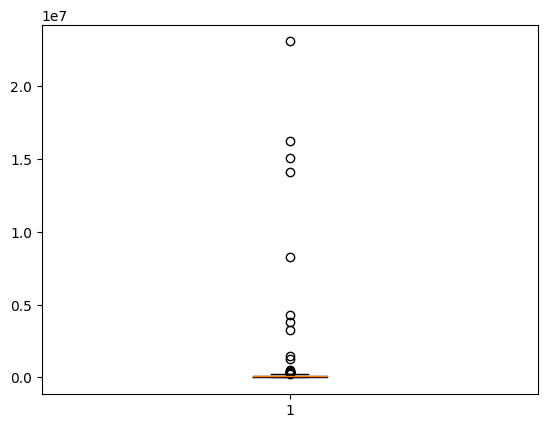

In [29]:
plt.boxplot(reading_sum['reading'])

In [30]:
csv_path_other_app = "/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/metadata_and_surveys/metadata/other_appliance.csv"

# Load the CSV file into a DataFrame
df_oth_app = pd.read_csv(csv_path_other_app)

# Display the first few rows of the DataFrame
df_oth_app

,otherapplianceid,homeid,appliance_name,number
0,1,113,outdoor_electric_space_heater,1
1,2,126,outdoor_gas_space_heater,2
2,3,306,outdoor_gas_space_heater,2
3,4,168,outdoor_hot_tub,1
4,5,89,outdoor_water_feature,1
...,...,...,...,...
2688,2689,330,motor_vehicle,1
2689,2690,331,motor_vehicle,1
2690,2691,332,motor_vehicle,1
2691,2692,334,motor_vehicle,1


In [31]:
df_oth_app['appliance_name'].unique()

gas_appliances = ['outdoor_gas_space_heater',
                  'outdoor_hot_tub']

electric_appliances = ['outdoor_electric_space_heater',
                       'outdoor_water_feature',
                       'outdoor_light',
                       'television',
                       'media_entertainment',
                       'sound_system',
                       'humidifier',
                       'dehumidifier',
                       'vacuum_cleaner',
                       'iron',
                       'electric_heater',
                       'electric_blanket',
                       'electric_fan',
                       'air_conditioning',
                       'computer',
                       'laptop',
                       'tablet',
                       'smartphone',
                       'non_smart_phone',
                       'other_high_power_1',
                       'other_high_power_2',
                       'other_high_power_3',
                       'other_high_power_4',
                       'motor_vehicle']

In [32]:
csv_path_person = "/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/metadata_and_surveys/metadata/person.csv"

# Load the CSV file into a DataFrame
df_person = pd.read_csv(csv_path_person)

# Display the first few rows of the DataFrame
df_person.head()

,personid,homeid,primaryparticipant,relationtoprimary,gender,ageband,workingstatus,weeklyhoursofwork,education,ageleavingeducation,signedup,startdate,highest_earner
0,617,47,1,NaN,Female,25-29,Paid work,31-40,"Degree level qualification (or equivalent), e....",23.0,1,2016-08-16,0
1,618,47,0,"Husband, wife or partner",Male,20-24,Paid work,41-50,"Degree level qualification (or equivalent), e....",NaN,0,2016-08-16,0
2,621,59,1,NaN,Male,30-34,Paid work,31-40,"Degree level qualification (or equivalent), e....",21.0,1,2016-10-06,1
3,622,59,0,"Husband, wife or partner",Female,30-34,Paid work,41-50,"Degree level qualification (or equivalent), e....",22.0,0,2016-10-06,0
4,1047,59,0,"Son or daughter, inc. adopted, step, foster an...",NaN,0-4,NaN,NaN,NaN,NaN,0,2017-09-22,0


In [33]:
df_person['workingstatus'].unique()

array(['Paid work', nan, 'A student at school or in further education',
       'Pre-school/ nursery',
       'A student in University, college, higher education or adult education ',
       'Self-employed', 'Voluntary or unpaid work', 'Retired',
       'Looking after home/family', 'Unemployed (not seeking work)',
       'Unemployed (seeking work)', 'Other', 'Permanently sick/disabled'],
      dtype=object)

In [34]:
selected_columns = ['homeid', 'primaryparticipant', 'ageband', 'workingstatus']
df_person = df_person[selected_columns]
df_person

,homeid,primaryparticipant,ageband,workingstatus
0,47,1,25-29,Paid work
1,47,0,20-24,Paid work
2,59,1,30-34,Paid work
3,59,0,30-34,Paid work
4,59,0,0-4,NaN
...,...,...,...,...
611,334,0,10-14,A student at school or in further education
612,334,0,10-14,A student at school or in further education
613,334,0,5-9,A student at school or in further education
614,335,1,30-34,Paid work


In [35]:
csv_path_room = "/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/metadata_and_surveys/metadata/room.csv"

# Load the CSV file into a DataFrame
df_room = pd.read_csv(csv_path_room)

# Display the first few rows of the DataFrame
df_room

,roomid,homeid,type,secondarytype,storey,externalwindows,externaldoors,externalwalls,floorarea,height,...,trvs,clothesdrying,windowsopen,thermostat,othertype,stairup,stairupdoor,stairdown,stairdowndoor,mezzanine
0,650,47,kitchen,NaN,3,1,0,1,55,290,...,None,never,1,0,NaN,0,0.0,0,0.0,0
1,651,47,livingroom,NaN,3,1,0,1,172,290,...,None,sometimes,1,0,NaN,0,0.0,0,0.0,0
2,652,47,bathroom,NaN,3,0,0,0,41,210,...,None,never,0,0,NaN,0,0.0,0,0.0,0
3,653,47,bedroom,NaN,3,1,0,1,130,190,...,None,never,1,0,NaN,0,0.0,0,0.0,0
4,654,47,hall,NaN,3,0,0,0,29,190,...,None,never,0,1,NaN,0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,3040,335,bathroom,NaN,1,1,0,1,65,229,...,None,never,1,0,NaN,0,0.0,0,0.0,0
2172,3041,335,bedroom,NaN,1,1,0,2,100,229,...,All,never,1,0,NaN,0,0.0,0,0.0,0
2173,3042,335,bedroom,NaN,1,1,0,2,100,229,...,All,never,1,0,NaN,0,0.0,0,0.0,0
2174,3043,335,bedroom,NaN,1,1,0,2,115,229,...,All,never,1,0,NaN,0,0.0,0,0.0,0


In [36]:
#df_room['total_area'] =  df_room.groupby('homeid')['floorarea'].transform('sum')

In [37]:
df_room1 = df_room.groupby('homeid')['floorarea'].sum()
df_room1 = pd.DataFrame(df_room1)
df_room1 = df_room1.rename(columns={'floorarea' : 'total_area'})
df_room1

,total_area
homeid,
47,427
59,760
61,685
62,815
63,725
...,...
331,900
332,515
333,945


In [38]:
df_room_proc = df_room.groupby('homeid')['type'].count()
df_room_proc = pd.DataFrame(df_room_proc)
df_room_proc = df_room_proc.rename(columns={'type' : 'room_count'})
df_room_proc

,room_count
homeid,
47,5
59,6
61,9
62,7
63,9
...,...
331,11
332,6
333,7


In [39]:
df_room_proc_merge = pd.merge(df_room1, df_room_proc, on='homeid', how='left')
df_room_proc_merge

,total_area,room_count
homeid,,
47,427,5
59,760,6
61,685,9
62,815,7
63,725,9
...,...,...
331,900,11
332,515,6
333,945,7


In [40]:
df_room_proc1 = df_room.groupby('homeid')['windowsopen'].sum()
df_room_proc1 = pd.DataFrame(df_room_proc1)
df_room_proc1 = df_room_proc1.rename(columns={sum : 'windows_open'})
df_room_proc1

,windowsopen
homeid,
47,3
59,5
61,5
62,4
63,6
...,...
331,8
332,5
333,5


In [41]:
df_room_merge = pd.merge(df_room_proc_merge, df_room_proc1, on='homeid', how='left')
df_room_merge

,total_area,room_count,windowsopen
homeid,,,
47,427,5,3
59,760,6,5
61,685,9,5
62,815,7,4
63,725,9,6
...,...,...,...
331,900,11,8
332,515,6,5
333,945,7,5


In [42]:
# Count occurrences of 'type' for each 'homeid' and 'roomid'
room_counts = df_room.groupby(['homeid', 'type', 'roomid']).size().reset_index(name='count')

# Set 'roomid' as the secondary index
room_counts.set_index(['homeid', 'roomid'], inplace=True)

# Create a pivot table with 'type' as columns and 'count' as values
room_type = room_counts.pivot(columns='type', values='count').fillna(0)

# Reset index to turn 'homeid' and 'roomid' back into columns
room_type.reset_index(inplace=True)

room_type


type,homeid,roomid,bathroom,bedroom,conservatory,cupboard,diningroom,hall,kitchen,kitchenliving,livingroom,other,outside,playroom,study,utility
0,47,650,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47,651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,47,652,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47,653,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47,654,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,335,3040,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2172,335,3041,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2173,335,3042,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2174,335,3043,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
unique_types_per_roomid = df_room.groupby('roomid')['type'].unique()

display(unique_types_per_roomid)

roomid
650        [kitchen]
651     [livingroom]
652       [bathroom]
653        [bedroom]
654           [hall]
            ...     
3044       [utility]
3046       [utility]
3047       [utility]
3070       [utility]
3071       [utility]
Name: type, Length: 2176, dtype: object

In [44]:
csv_path_sensor = "/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/metadata_and_surveys/metadata/sensor.csv"

# Load the CSV file into a DataFrame
df_sensor = pd.read_csv(csv_path_sensor)

# Display the first few rows of the DataFrame
print(df_sensor.head())

   sensorid      sensorboxid         type   unit  status  roomid  \
0      1174  279492261292874        light  0.1cd  active     650   
1      1175  279492261292874     humidity   0.1%  active     650   
2      1176  279492261292874  temperature   0.1C  active     650   
3      1177  279492261292874      battery  0.01V  active     650   
4      1178  279492261292874      battery  0.01V  active     650   

  subcircuit_type  scalingfactor rawunit  counter  
0             NaN            1.0     NaN        1  
1             NaN            1.0     NaN        1  
2             NaN            1.0     NaN        1  
3             NaN            1.0     NaN        1  
4             NaN            1.0     NaN        2  


In [45]:
selected_columns = ['sensorboxid', 'roomid', 'type']
df_sensor = df_sensor[selected_columns]
df_sensor

,sensorboxid,roomid,type
0,279492261292874,650,light
1,279492261292874,650,humidity
2,279492261292874,650,temperature
3,279492261292874,650,battery
4,279492261292874,650,battery
...,...,...,...
20076,279492261297010,3026,humidity
20077,279492261297010,3026,temperature
20078,279492261297010,3026,battery
20079,279492261297010,3026,battery


In [46]:
df_sensor.shape

(20081, 3)

In [47]:
csv_path_sensorbox = "/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/metadata_and_surveys/metadata/sensorbox.csv"

# Load the CSV file into a DataFrame
df_sensorbox = pd.read_csv(csv_path_sensorbox)

# Display the first few rows of the DataFrame
print(df_sensorbox.head())

       sensorboxid  local_id  roomid  status sensorbox_type         notes  \
0  279492261292874         1     650  active           room  Behind door.   
1  279492261292875         2     650  active          clamp           NaN   
2  279492261292876         3     650  active          clamp           NaN   
3  279492261292877         4     651  active           room           NaN   
4  279492261292878         5     652  active           room           NaN   

   heightfromfloor name  onMainThermostat  temperatureInaccuracy  ...  \
0              157  NaN                 0                      0  ...   
1                0  NaN                 0                      0  ...   
2                0  NaN                 0                      0  ...   
3              161  NaN                 0                      0  ...   
4              158  NaN                 0                      0  ...   

   clamp1pipe  clamp2pipe gasblock installtime applianceid hasTRV  \
0         NaN         NaN    

In [48]:
df_sensorbox['clamp1pipe'].unique()


array([nan, 'Cold', 'CH Return', 'Hot', 'CH Flow', 'RadiatorOutput',
       'Shower', 'RadiatorInput', 'Oven', 'Bath', 'Sink'], dtype=object)

In [49]:
selected_columns = ['sensorboxid', 'sensorbox_type', 'heightfromfloor']
df_sensorbox = df_sensorbox[selected_columns]
df_sensorbox

,sensorboxid,sensorbox_type,heightfromfloor
0,279492261292874,room,157
1,279492261292875,clamp,0
2,279492261292876,clamp,0
3,279492261292877,room,161
4,279492261292878,room,158
...,...,...,...
4028,279492261297006,room,183
4029,279492261297007,clamp,0
4030,279492261297008,clamp,0
4031,279492261297009,room,176


In [50]:
df_sensorbox.shape

(4033, 3)

In [51]:
csv_path_tariff = "/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/metadata_and_surveys/metadata/tariff.csv"

# Load the CSV file into a DataFrame
df_tariff = pd.read_csv(csv_path_tariff)

# Display the first few rows of the DataFrame
df_tariff

,homeid,notification_date,provenancedetail,energytype,daily_standing_charge_pence,unit_charge_pence_per_kwh
0,167,2016-08-25,primary_facetoface_initial,electricity,23.02,NaN
1,62,2016-08-26,primary_facetoface_initial,electricity,31.31,NaN
2,62,2016-08-26,primary_facetoface_initial,gas,24.74,NaN
3,61,2016-10-06,primary_facetoface_initial,electricity,0.33,0.12
4,61,2016-10-06,primary_facetoface_initial,gas,0.30,0.33
...,...,...,...,...,...,...
561,319,2018-05-31,in_app,gas,21.00,3.53
562,319,2018-05-31,in_app,gas,23.00,3.71
563,319,2018-05-31,in_app,gas,22.00,3.53
564,321,2018-06-05,in_app,electricity,19.00,3.75


In [60]:
csv_path_weatherfeed = "/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/metadata_and_surveys/metadata/weatherfeed.csv"

# Load the CSV file into a DataFrame
df_weatherfeed = pd.read_csv(csv_path_weatherfeed)

# Display the first few rows of the DataFrame
df_weatherfeed

,feedid,weather_type,locationid,unit,source,url
0,1,temperature,Edinburgh,0.1C,Weather Underground (https://www.wunderground....,http://api.wunderground.com/api/2ade142c965f01...
1,2,conditions,Edinburgh,text,Weather Underground (https://www.wunderground....,http://api.wunderground.com/api/2ade142c965f01...
2,3,humidity,Edinburgh,0.1%,Weather Underground (https://www.wunderground....,http://api.wunderground.com/api/2ade142c965f01...
3,4,windspeed,Edinburgh,0.1kph,Weather Underground (https://www.wunderground....,http://api.wunderground.com/api/2ade142c965f01...
4,5,winddirection,Edinburgh,NaN,Weather Underground (https://www.wunderground....,http://api.wunderground.com/api/2ade142c965f01...
5,24,windspeed,Midlothian,0.1kph,Weather Underground (https://www.wunderground....,http://api.wunderground.com/api/2ade142c965f01...
6,23,humidity,Midlothian,0.1%,Weather Underground (https://www.wunderground....,http://api.wunderground.com/api/2ade142c965f01...
7,22,conditions,Midlothian,text,Weather Underground (https://www.wunderground....,http://api.wunderground.com/api/2ade142c965f01...
8,21,temperature,Midlothian,0.1C,Weather Underground (https://www.wunderground....,http://api.wunderground.com/api/2ade142c965f01...
9,20,winddirection,WestLothian,NaN,Weather Underground (https://www.wunderground....,http://api.wunderground.com/api/2ade142c965f01...


In [53]:
selected_columns = ['feedid', 'weather_type', 'locationid']
df_weatherfeed = df_weatherfeed[selected_columns]
df_weatherfeed

,feedid,weather_type,locationid
0,1,temperature,Edinburgh
1,2,conditions,Edinburgh
2,3,humidity,Edinburgh
3,4,windspeed,Edinburgh
4,5,winddirection,Edinburgh
5,24,windspeed,Midlothian
6,23,humidity,Midlothian
7,22,conditions,Midlothian
8,21,temperature,Midlothian
9,20,winddirection,WestLothian


In [54]:
df_weatherfeed.to_csv('weatherfeed.csv',  index=False)


In [55]:
df_weatherfeed.shape

(25, 3)

In [56]:
# Merge tables
merged_df = pd.merge(df_home, df_appliance_proc, on='homeid', how='left')
merged_df = pd.merge(merged_df, df_room_merge, on='homeid', how='left')
merged_df

,homeid,location,residents,hometype,equivalised_income,occupied_days,occupied_nights,entry_floor,income_band_num,start_date,end_date,days_between,electric_appliance,gas_appliance,total_area,room_count,windowsopen
0,47,Edinburgh,2,flat,missing,2,7,3,0,2016-08-10,2017-05-08,271,6,4,427,5,3
1,59,Edinburgh,2,flat,above_median,3,7,0,1,2016-10-06,2018-01-28,479,6,1,760,6,5
2,61,Edinburgh,2,house_or_bungalow,above_median,2,7,0,2,2016-10-06,2017-10-19,378,8,5,685,9,5
3,62,Edinburgh,2,flat,above_median,1,7,2,3,2016-08-26,2018-06-30,673,7,5,815,7,4
4,64,Edinburgh,4,flat,above_median,6,7,1,4,2016-10-20,2018-06-30,618,6,2,650,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,331,Fife,2,house_or_bungalow,above_median,7,7,0,5,2018-04-12,2018-06-30,79,9,4,900,11,8
251,332,Edinburgh,1,flat,above_median,2,7,0,11,2018-04-19,2018-06-30,72,9,5,515,6,5
252,334,Edinburgh,5,flat,below_median,4,7,0,7,2018-04-30,2018-06-30,61,9,2,805,8,6
253,335,EastLothian,4,house_or_bungalow,above_median,2,7,0,12,2018-04-30,2018-06-30,61,10,2,1120,12,9


In [57]:
!ls ..

combine_all.ipynb    getdata.py		README.md	  thaisnotebook
convert_save.ipynb   LICENSE		requirements.txt  weatherfeed.csv
exportdata.ipynb     masterfeature.csv	scrapbook.ipynb
feature.py	     notebook		test.ipynb
gas_scrapbook.ipynb  params.py		thais_notebook


In [58]:
merged_df.to_csv('masterfeature.csv',  index=False)

In [59]:
csv_path_weatherfeed = '/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/household_sensors/sensordata/weatherreading.csv'
# Load the CSV file into a DataFrame
df_weather = pd.read_csv(csv_path_weatherfeed)

# Display the first few rows of the DataFrame
df_weather

,feedid,time,value
0,5,2016-08-10 00:00:02,SSE
1,4,2016-08-10 00:00:02,0
2,2,2016-08-10 00:00:02,Mostly Cloudy
3,1,2016-08-10 00:00:02,112
4,3,2016-08-10 00:00:02,690
...,...,...,...
1160786,35,2018-06-30 23:45:02,North
1160787,34,2018-06-30 23:45:02,14
1160788,32,2018-06-30 23:45:02,Clear
1160789,31,2018-06-30 23:45:02,120
